# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [1]:
from re import match
from typing import Annotated
from unittest import case

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from pygame.examples.eventlist import showtext

pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\berat\AppData\Roaming\Python\Python312\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
url = "https://books.toscrape.com/"

In [3]:
response = requests.get(url)

In [4]:
page_element = BeautifulSoup(response.text, "html.parser")

In [5]:
product_elements = page_element.select("article.product_pod")
product_elements

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [6]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."

    # YOUR CODE HERE
    image_element = product_element.select_one("img").get("src")
    print(image_element)
    return image_element

Test your implementation by running the following cell.

In [7]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg


**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [8]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."

    rating = product_element.select_one("p").get("class")[1]
    mapping = {"One":1,
               "Two":2,
               "Three":3,
               "Four":4,
               "Five":5}

    print(mapping.get(rating))
    return mapping.get(rating)

Test your implementation by running the following cell.

In [9]:
### TEST
assert get_rating(product_elements[0]) == 3

3


**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [10]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."

    title = product_element.select_one("img").get("alt")
    print(title)
    return title

Test your implementation by running the following cell.

In [11]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

A Light in the Attic


**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [12]:
def get_price(product_element):
    "Get the price of the given product element."
    # <p class="price_color">Â£51.77</p>

    price = product_element.select_one(".price_color").text
    price = price.replace("£", "")
    price = price.replace("Â", "")
    price = float(price)
    print(price)
    return price

Test your implementation by running the following cell.

In [13]:
### TEST
assert get_price(product_elements[0]) == 51.77

51.77


In [14]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [15]:
get_attributes(product_elements[0])

media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
3
A Light in the Attic
51.77


{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [16]:
product_data = [get_attributes(product_element) for product_element in product_elements]

media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
3
A Light in the Attic
51.77
media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
1
Tipping the Velvet
53.74
media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
1
Soumission
50.1
media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
4
Sharp Objects
47.82
media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
5
Sapiens: A Brief History of Humankind
54.23
media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg
1
The Requiem Red
22.65
media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg
4
The Dirty Little Secrets of Getting Your Dream Job
33.34
media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg
3
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
17.93
media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg
4
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
22.6
media/cache/58/46/5846057e28022268153beff6d352b06c.jpg
1
The Black Maria
52.15
med

In [17]:
df = pd.DataFrame(product_data)

In [18]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [19]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [20]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    df["rating"].value_counts().plot.bar()
    print(df.groupby(["rating"]).size())


rating
1    6
2    3
3    3
4    4
5    4
dtype: int64


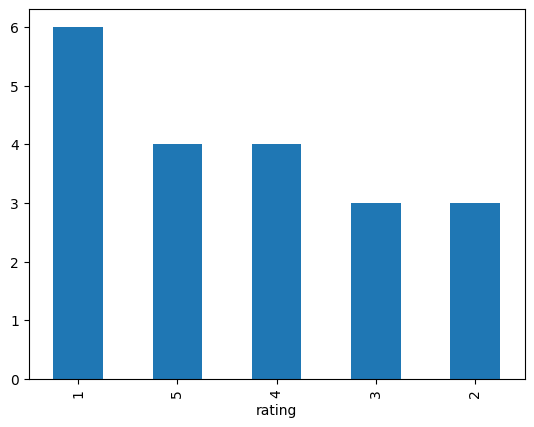

In [21]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [22]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.title("Price Distribution")
    df["price"].hist(bins = 5)
    print(df["price"].describe())


count    20.000000
mean     38.048500
std      15.135231
min      13.990000
25%      22.637500
50%      41.380000
75%      51.865000
max      57.250000
Name: price, dtype: float64


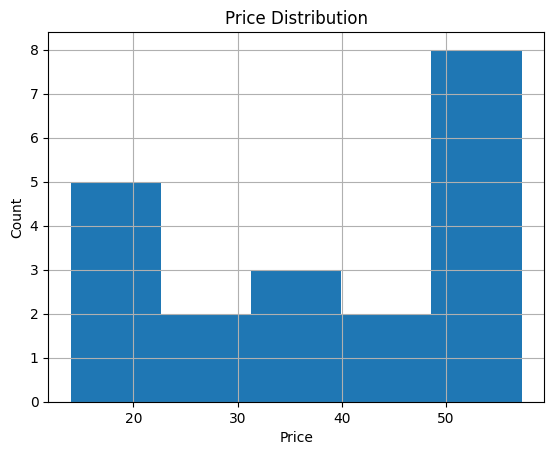

In [23]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [24]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""
    plt.xlabel("Title Length")
    plt.ylabel("Count")
    df["title_length"] = df["title"].str.len()
    df["title_length"].hist(bins=6)

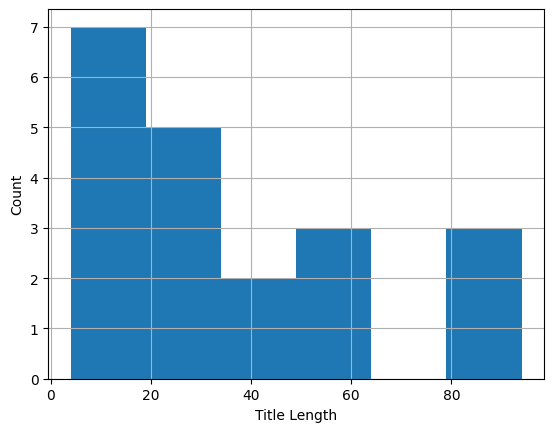

In [25]:
plot_title_length_distribution(df)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [26]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    plt.xlabel("Rating")
    plt.ylabel("Count")
    sns.boxplot(x="rating", y="price", data=df)


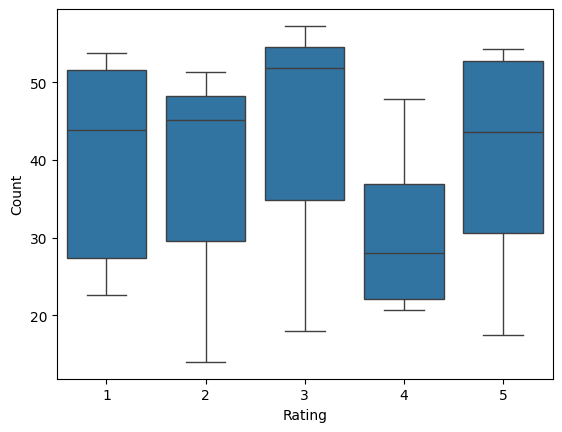

In [27]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [28]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""
    sns.heatmap(df.corr(numeric_only=True), annot=True)

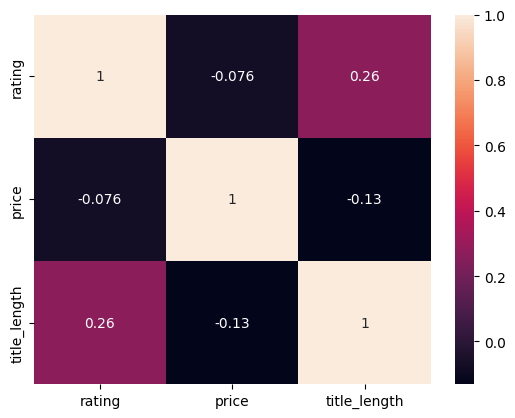

In [29]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [30]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    grouped = df["price"].groupby(df["rating"])
    stats = grouped.describe()
    stats["median"] =  stats["50%"]
    stats["range"] = stats["max"] - stats["min"]
    return stats


In [31]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,50%,75%,max,median,range
rating,,,,,,,,,,
1,6.0,40.018333,14.178174,22.65,27.3075,43.845,51.6375,53.74,43.845,31.09
2,3.0,36.830000,20.018382,13.99,29.5800,45.170,48.2500,51.33,45.170,37.34
3,3.0,42.316667,21.296472,17.93,34.8500,51.770,54.5100,57.25,51.770,39.32
4,4.0,31.105000,12.460865,20.66,22.1150,27.970,36.9600,47.82,27.970,27.16
5,4.0,39.750000,17.186613,17.46,30.6300,43.655,52.7750,54.23,43.655,36.77


In [18]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = Chrome()
driver.get("https://books.toscrape.com/")

side_element = driver.find_element(By.CLASS_NAME, "side_categories")
category_elements = side_element.find_elements(By.TAG_NAME, "a")

categories = []
links = []

categories_data = {
    "category_name" : categories,
    "links" : links
}

for c in category_elements[1:4]: 
    categories.append(c.text.strip())
    links.append(c.get_attribute("href"))

books_data = {
    "book_title": [],
    "category_name": []
}

for category_name,link in zip(categories,links):
    driver.get(link)
    time.sleep(0.5)

    books = driver.find_elements(By.CLASS_NAME, "product_pod")
    for book in books:
        title = book.find_element(By.TAG_NAME, "h3").find_element(By.TAG_NAME, "a").get_attribute("title")
        books_data["book_title"].append(title)
        books_data["category_name"].append(category_name)

df = pd.DataFrame(books_data)
print(df)

                                           book_title       category_name
0                             It's Only the Himalayas              Travel
1   Full Moon over Noah’s Ark: An Odyssey to Mount...              Travel
2   See America: A Celebration of Our National Par...              Travel
3   Vagabonding: An Uncommon Guide to the Art of L...              Travel
4                                Under the Tuscan Sun              Travel
5                                  A Summer In Europe              Travel
6                            The Great Railway Bazaar              Travel
7                    A Year in Provence (Provence #1)              Travel
8   The Road to Little Dribbling: Adventures of an...              Travel
9           Neither Here nor There: Travels in Europe              Travel
10                 1,000 Places to See Before You Die              Travel
11                                      Sharp Objects             Mystery
12                               In a 